<a href="https://colab.research.google.com/github/garyandre1/analisis-exploratorio/blob/master/Regresion_lineal%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [2]:
data = pd.read_csv("student-mat.csv",sep=";" )
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data = data[["G1","G2", "G3", "studytime","failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [5]:
predict = "G3"

In [6]:
X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

<ipython-input-6-8b23143b2940>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([predict], 1))


In [7]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size= 0.1)

In [8]:
linear = linear_model.LinearRegression()

In [9]:
linear .fit(x_train, y_train)

LinearRegression()

In [10]:
acc = linear.score(x_test, y_test)
print(acc)

0.8276210713479372


In [14]:
with open ("studentmodel.pickle", "wb") as f:
  pickle.dump(linear, f)

In [ ]:
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle .load(pickle_in)

In [11]:
print("coefficient:\n", linear.coef_)
print("intercept:\n", linear.intercept_)

coefficient:
 [ 0.15720958  0.9722702  -0.21011034 -0.26862831  0.0341785 ]
intercept:
 -1.3757575657777785


In [12]:
prediccion = linear.predict(x_test)

In [13]:
for x in range(len(prediccion)):
  print(prediccion[x],x_test[x],y_test[x])

9.56717657205267 [10 10  2  0  2] 11
7.239860012971221 [8 8 2 0 0] 0
9.321114411478488 [ 8 10  2  0  4] 10
14.98900890685513 [14 15  2  0  0] 15
12.010711535634343 [11 12  2  0 12] 11
9.56717657205267 [10 10  2  0  2] 10
18.07848533205533 [16 18  3  0  2] 18
12.036246472961965 [12 12  1  0  2] 11
10.453746949284044 [13 10  2  1 22] 11
3.541801180570342 [3 5 2 1 8] 5
5.910108913265418 [7 7 2 1 2] 7
10.83840969559448 [11 11  1  0  0] 12
7.449970350452583 [8 8 1 0 0] 11
16.147627835875046 [15 16  3  0  7] 15
11.942354539980824 [11 12  2  0 10] 13
7.308217008624739 [8 8 2 0 2] 8
8.384796030971192 [10  9  3  0  2] 9
9.389471407132005 [ 8 10  2  0  6] 10
12.677148584059687 [13 13  3  0  0] 13
5.079592051493147 [7 6 1 1 0] 0
14.295206036389894 [14 14  1  0  2] 14
12.167921113748191 [12 12  2  0 12] 11
-0.27678321896952096 [11  0  3  0  0] 0
8.437696790338704 [9 9 2 0 2] 10
17.849498520144778 [17 17  2  0 13] 17
8.049063740108917 [ 6  9  1  2 14] 8
11.960779560523278 [15 12  2  1  0] 12
15.041

Text(0, 0.5, 'final_grade')

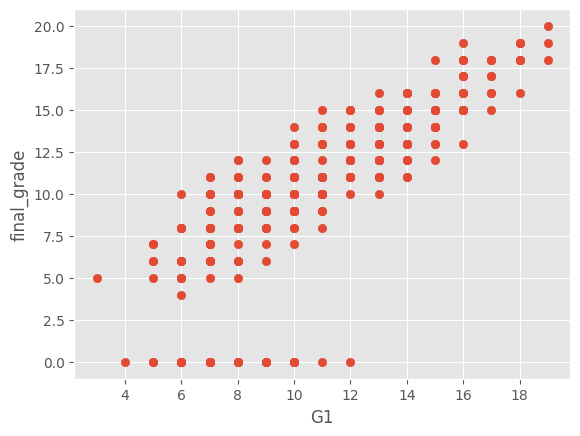

In [19]:
p = "G1"
style.use("ggplot")
pyplot.scatter(data[p], data['G3'])
pyplot.xlabel(p)
pyplot.ylabel("final_grade")

Text(0, 0.5, 'final_grade')

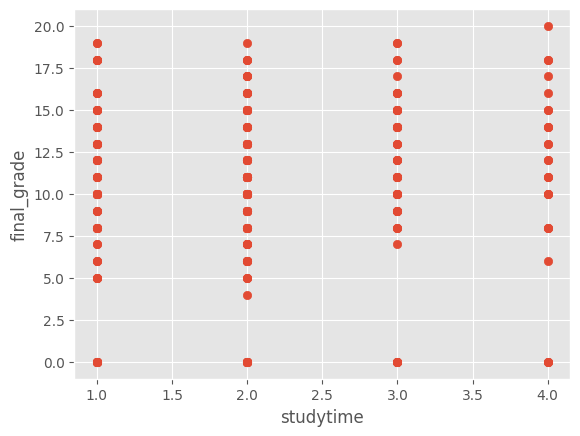

In [22]:
p = "studytime"
style.use("ggplot")
pyplot.scatter(data[p], data['G3'])
pyplot.xlabel(p)
pyplot.ylabel("final_grade")

Text(0, 0.5, 'final_grade')

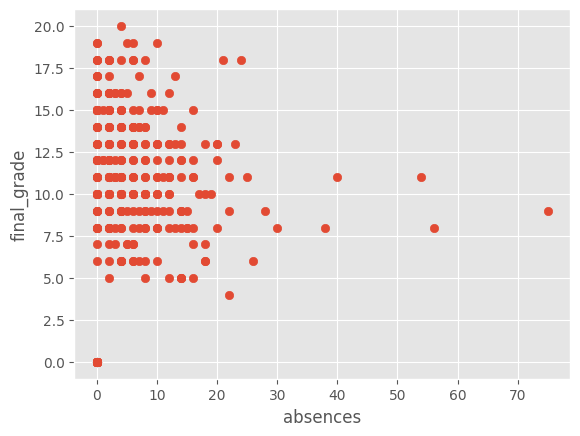

In [23]:
p = "absences"
style.use("ggplot")
pyplot.scatter(data[p], data['G3'])
pyplot.xlabel(p)
pyplot.ylabel("final_grade")